<a href="https://colab.research.google.com/github/Diwagarbk/DATA-VISUALISATION/blob/main/Decisiontreeclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
     


In [3]:
df=pd.read_csv("/content/diabetes.csv")


In [4]:

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
A=df.Glucose
B=df.Insulin
C=df.Age
D=df.BMI
     

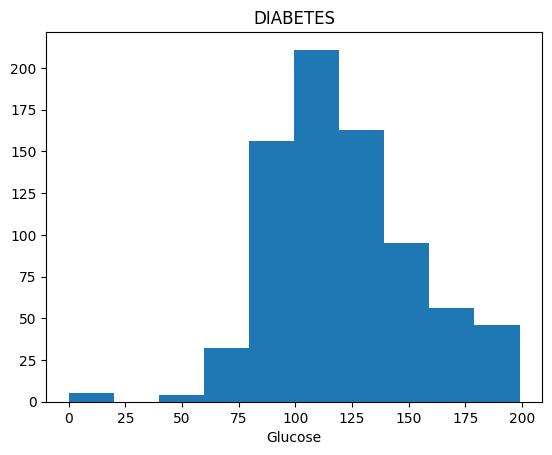

In [8]:
plt.hist(A)
plt.title("DIABETES")
plt.xlabel('Glucose')
plt.show()
     


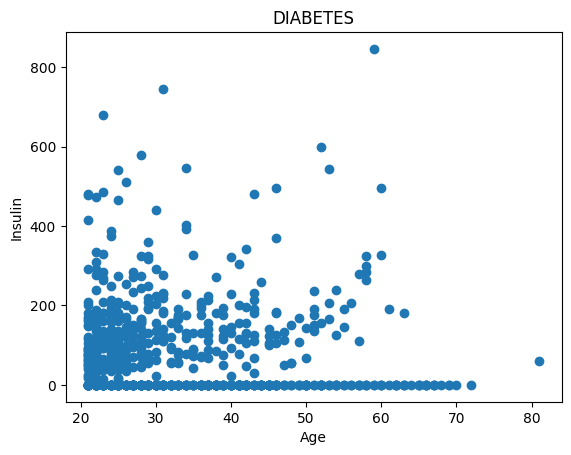

In [9]:
plt.scatter(C,B)
plt.title("DIABETES")
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.show()

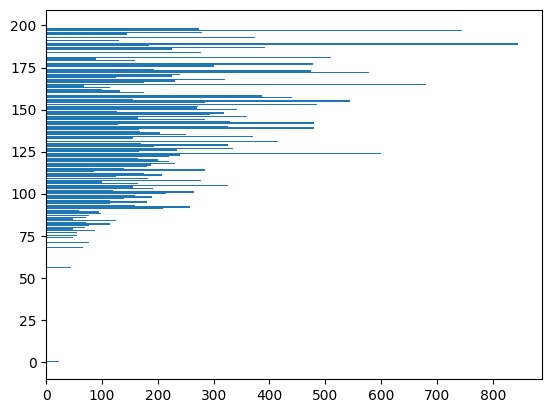

In [10]:

plt.barh(A,B)
plt.show()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [12]:

X=df.drop('Outcome',axis=1)
Y=df['Outcome']

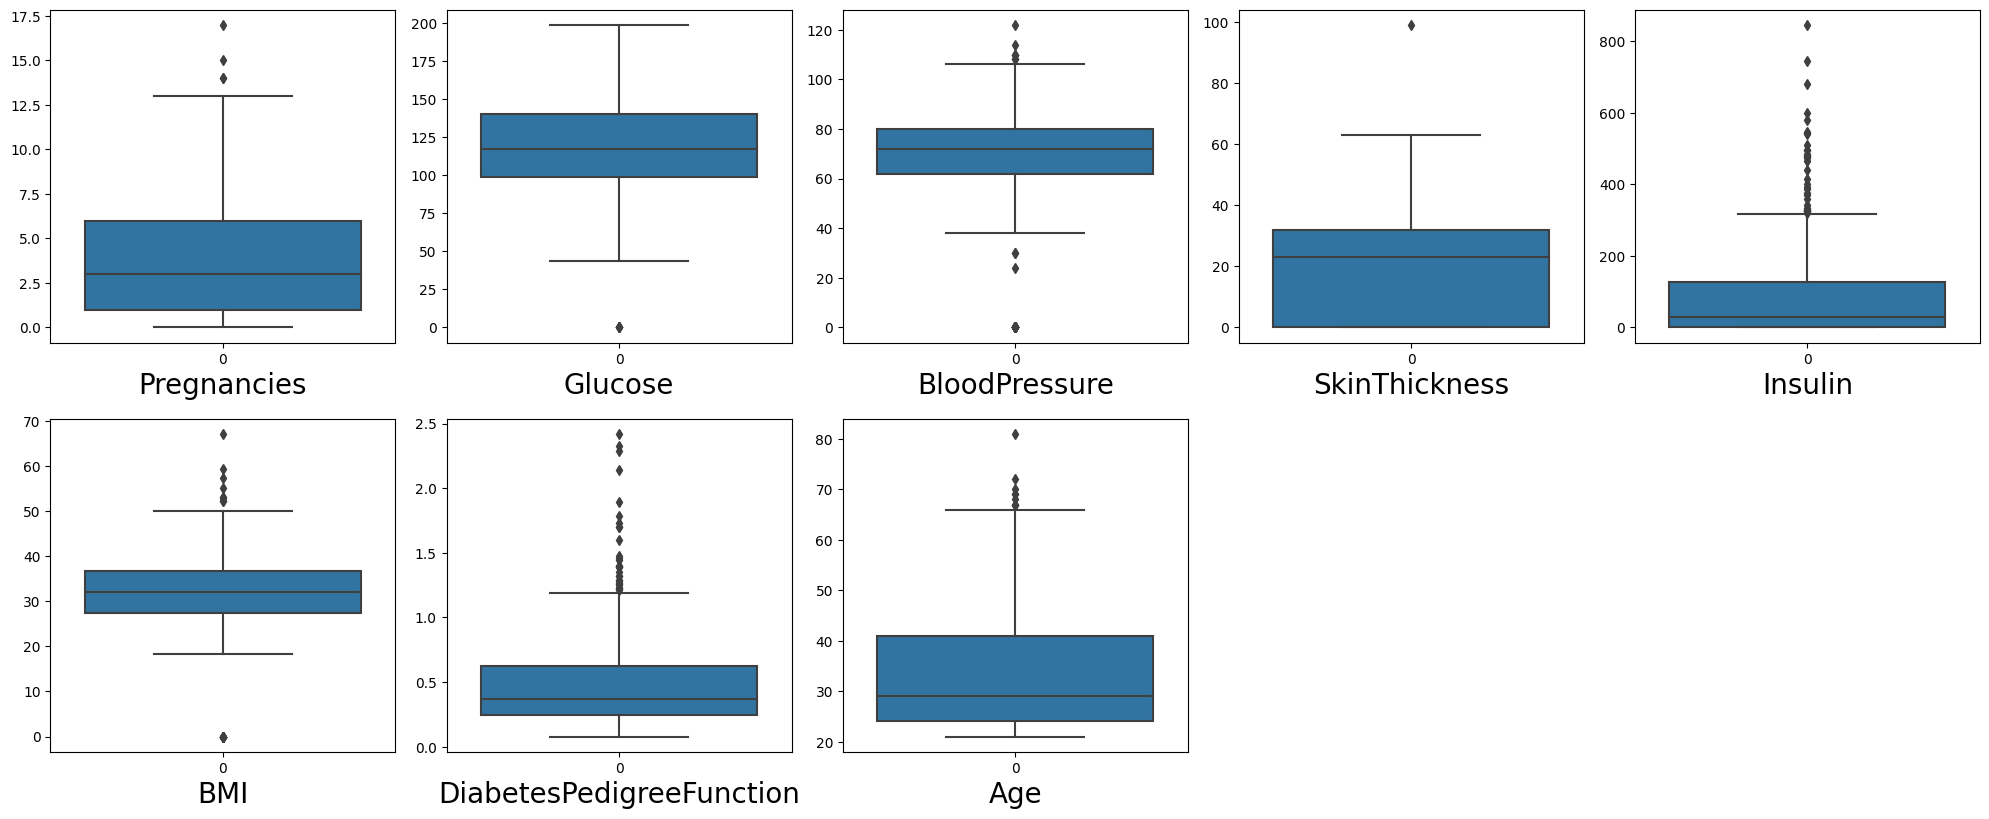

In [13]:

plt.figure(figsize=(20,20))
plotnumber=1
for col in X.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()
     

<ipython-input-14-176fa1589bcc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-14-176fa1589bcc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-14-176fa1589bcc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

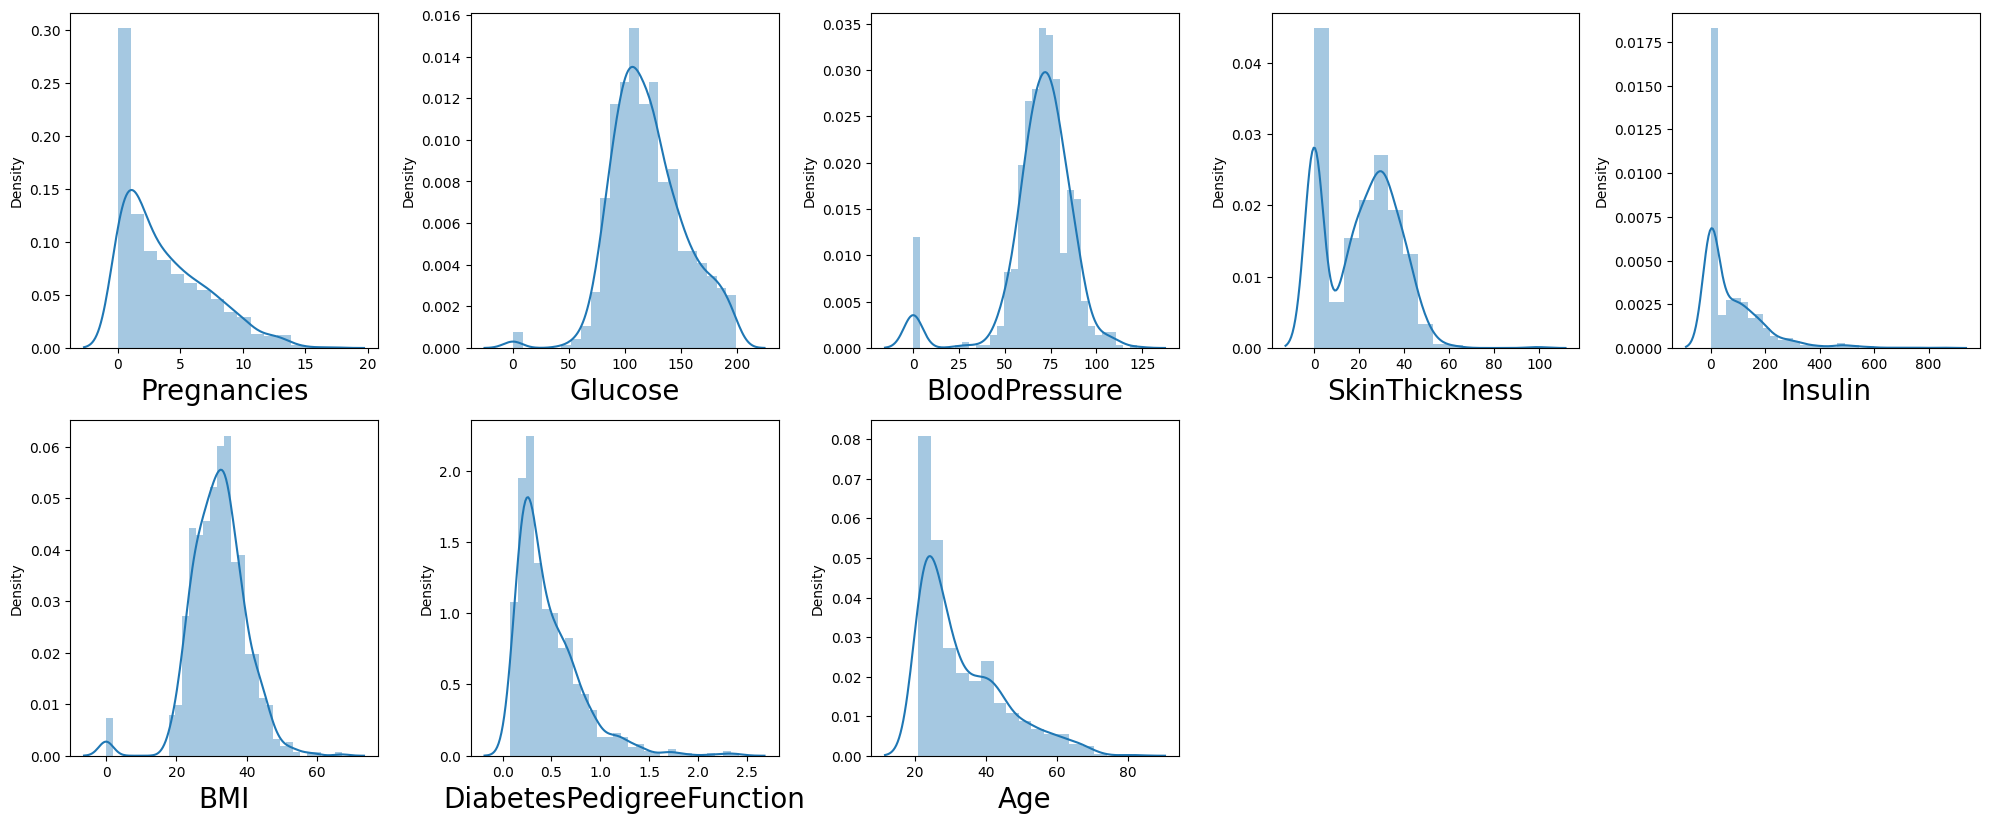

In [14]:

plt.figure(figsize=(20,20))
plotnumber=1
for col in X.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.distplot(X[col])
    plt.xlabel(col,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()

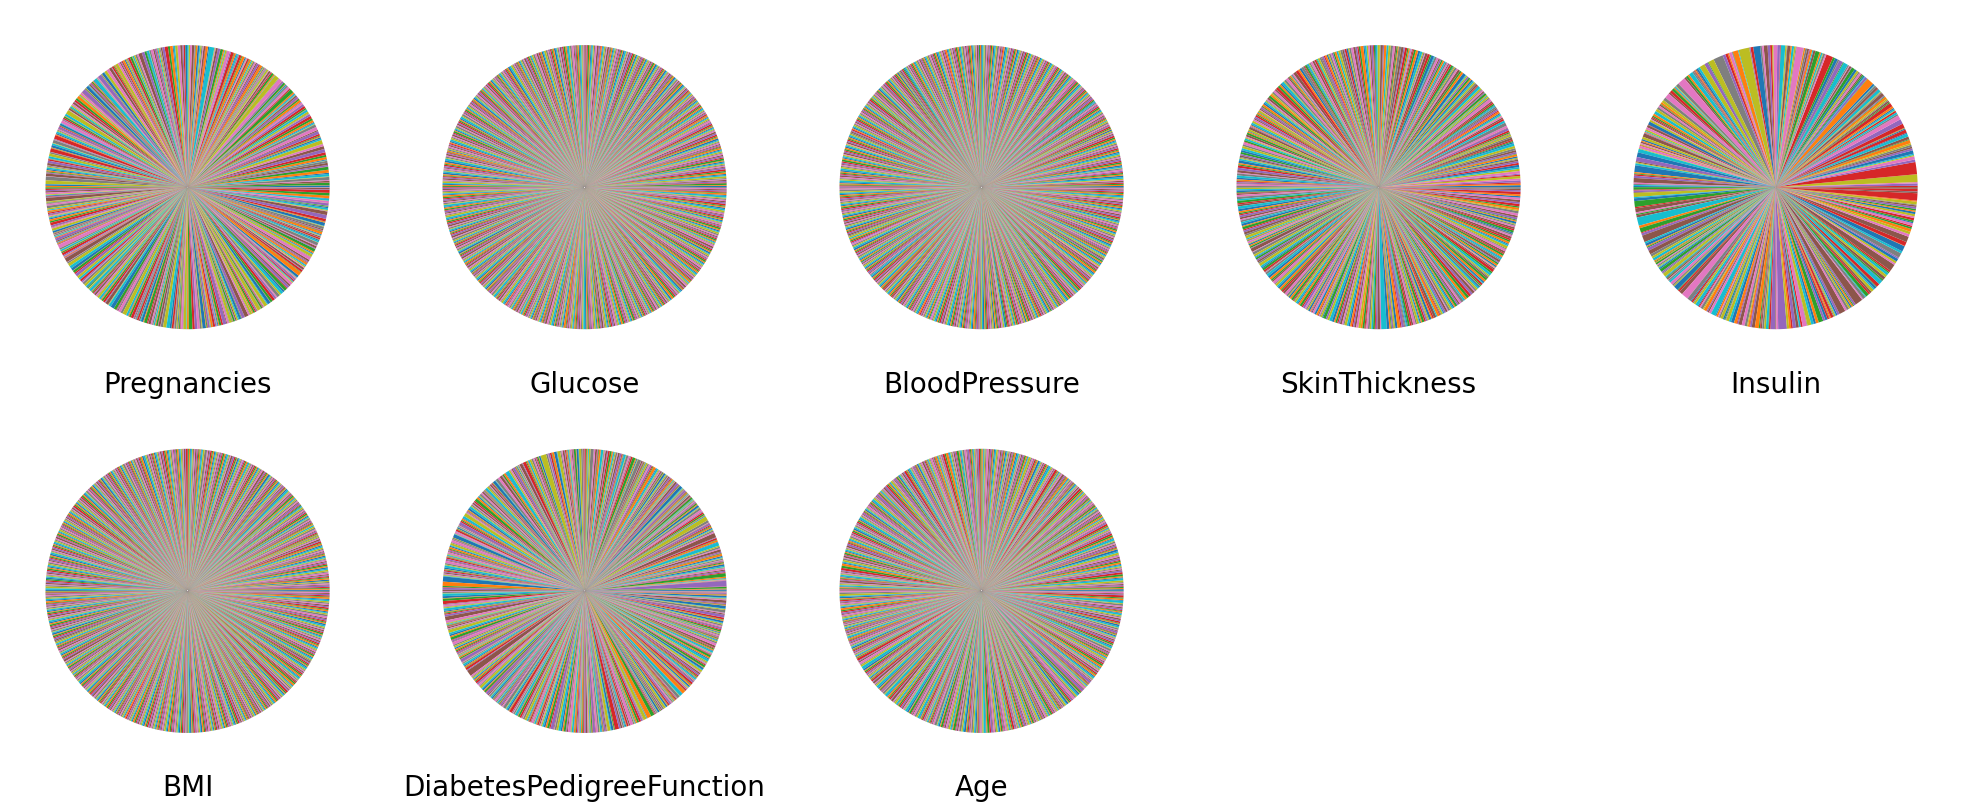

In [15]:

plt.figure(figsize=(20,20))
plotnumber=1
for col in X.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    plt.pie(X[col])
    plt.xlabel(col,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()
     


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=0)

In [17]:

a=StandardScaler()
X_train=a.fit_transform(X_train)
X_test=a.transform(X_test)

In [18]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
Y_pred=clf.predict(X_test)

In [20]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[198,  55],
       [ 57,  74]])

In [21]:
from sklearn.metrics import accuracy_score
     

accuracy_score(Y_test,Y_pred)


0.7083333333333334

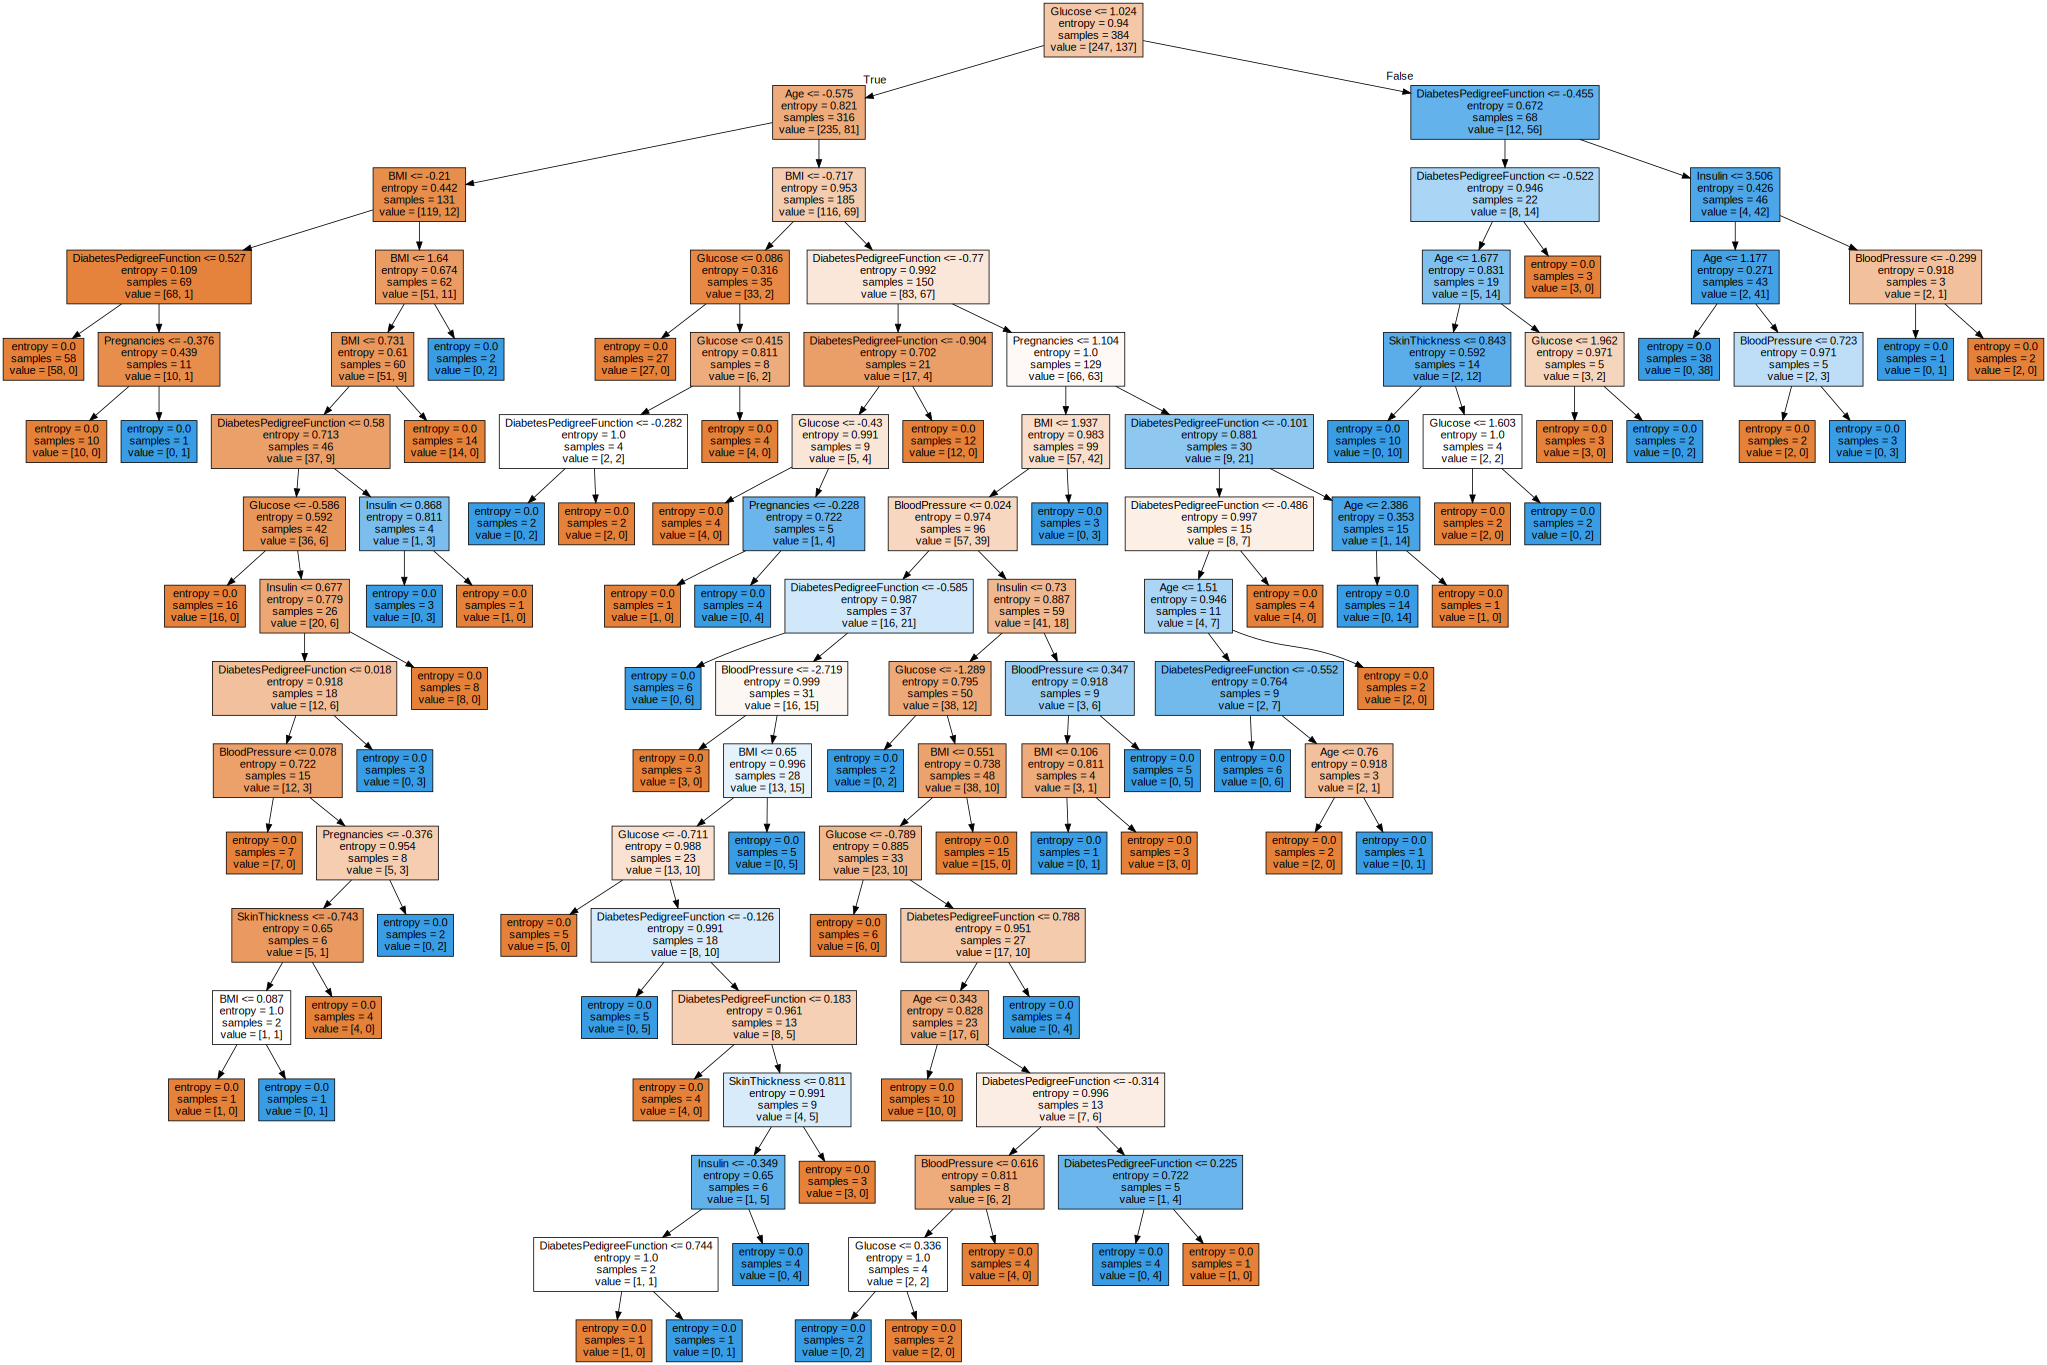

In [22]:


from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))

In [ ]:
""